In [1]:
%pylab inline
import sys
import numpy as np
import scipy.io.wavfile
from IPython.display import Audio, display, Markdown

# Save mixtures to disk, so you can listen to them in your audio player
def save_wav(data, out_file, rate):
    scaled = np.int16(data / np.max(np.abs(data)) * 32767)
    scipy.io.wavfile.write(out_file, rate, scaled)

# Or play them in your browser
def play_signals(data, sample_rate, title="Signal"):
    display(Markdown(title))
    display(Audio(data, rate=sample_rate))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load audio sources
source_file = 'maduk.wav'

sr, data = scipy.io.wavfile.read(source_file, mmap=False)

if len(np.shape(data)) == 2:

    data = data[2700000:3300000] # Cut off
    data = np.transpose(data)

    # Create source and measurement data
    # plot_signals(S_audio)
    for channel in data:
        print(np.shape(channel))
        play_signals(data, sr)
else:
    data = data[2700000:3300000] # Cut off
    play_signals(data, sr)

Signals

In [ ]:
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

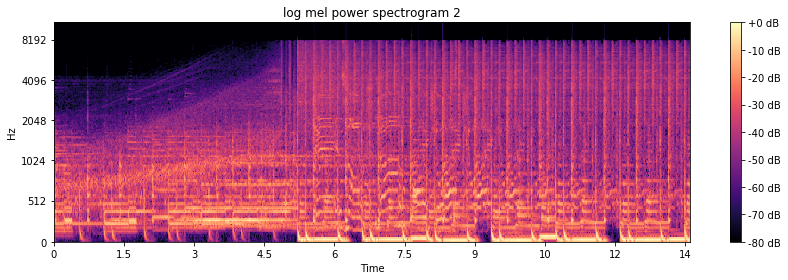

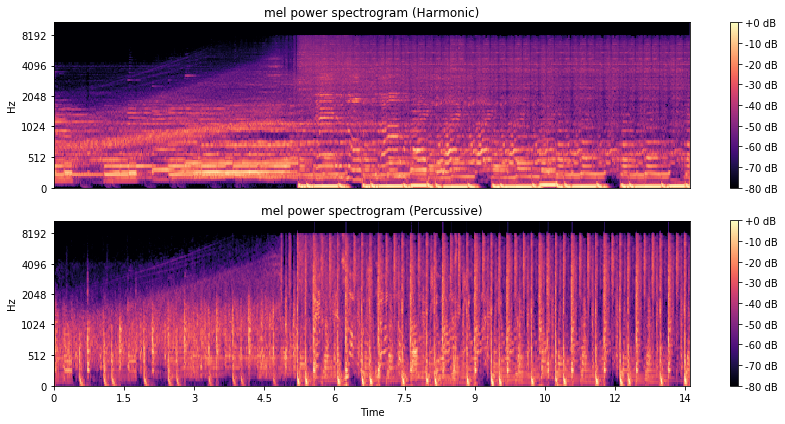

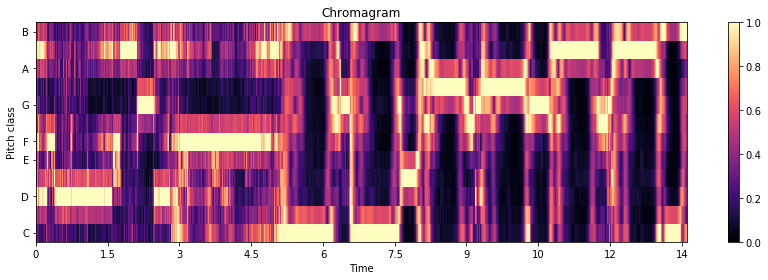

In [ ]:
float_data = np.float32(data)
y = float_data


S = librosa.feature.melspectrogram(y, sr=sr, n_mels=256)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('log mel power spectrogram 2')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

y_harmonic, y_percussive = librosa.effects.hpss(y)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

In [ ]:
def fastfft(y):
    # STFT
    D = librosa.stft(y)
    S, phase = librosa.magphase(D)

    S = np.log1p(S)

    return S

In [ ]:
def phase_restore(mag, random_phases, N=50):
    p = np.exp(1j * (random_phases))

    for i in range(N):
        _, p = librosa.magphase(librosa.stft(
            librosa.istft(mag * p)))
    return p

In [ ]:
# Read audio
y, sr = librosa.core.load('maduk.wav')
y = y[2500000:3100000]

# Fourier transform of wav file
S = fastfft(y)
# np.save(args.out_npy, S) # Possibility to save result

random_phase = S.copy()
np.random.shuffle(random_phase)

p = phase_restore((np.exp(S) - 1), random_phase, N=50) 

# ISTFT
reconstructed_y = librosa.istft((np.exp(S) - 1) * p) # Reconstruction to wav

# librosa.output.write_wav(args.out_audio, y, args.sr, norm=False) # Possibility to save result

In [ ]:
play_signals(y, sr, title="Original signal")
play_signals(reconstructed_y, sr, title="Reconstructed signal")

Original signal

Reconstructed signal

In [ ]:
print('Amount of samples in original', np.shape(y))
print('Amount of samples in reconstructed', np.shape(reconstructed_y))

Amount of samples in original (600000,)
Amount of samples in reconstructed (599552,)


In [ ]:
print('Shape of fourier spectrogram', np.shape(S))
print('Total amount of datapoints in spectogram:', np.shape(S)[0]*np.shape(S)[1])

Shape of fourier spectrogram (1025, 1172)
Total amount of datapoints in spectogram: 1201300


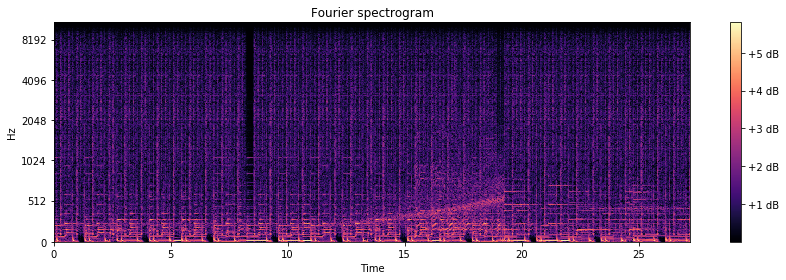

In [ ]:
# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Fourier spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()